## 0: Introductions / Welcome to the Party!

* Who am I?

* Who am I not?  
    * I am not the KGB, I am not monitoring you, I am not keeping a file on you, 
    * I have ZERO input in the actual admissions process
    * So ask your questions, THAT is what I am here for.

* Please do not be offended, but we're going to gloss over audience introductions.  There are over 20 people registered, and the demo is scheduled for 40 minutes, so if each person takes 1 minute to introduce themselves, we'll have eaten away half of our time together.

* Rather, I encourage you to contact me/us separately:

    * vhu4jv@virginia.edu (primary for me)
    * https://datascience.virginia.edu/news/msds-residential-student-ambassadors
    * https://datascience.virginia.edu/news/online-student-ambassadors

    (this is all of us, feel free to browse our self-introductions and connect with any/all who may align with your background better than I do)
    * I am a gay mid-thirties white dude with tattoos, piercings, and a military-industrial background.  I am not for everyone :)  
    * If you want to connect with someone who looks more like you, has a background more like yours, is interested in the same fields as you, is in the online program instead of the residential >> you absolutely can reach out to them.  
    * #### I promise you will not offend me :)

    *  we have LinkedIn profiles, we use Microsoft Bookings so you can make one-on-one videocall appointments, we have our emails (duh lol)

## So with that, let's dive in.

## 1:  What are we doing?

### Data is everywhere... start by being curious and asking a question.

I want to see the distributions of pokemon types across the universal pokedex.  Just going off of the basic blue/red/yellow, gold/silver/crystal, ruby/sapphire/emerald, pearl/diamond, ... scarlet/violet games, NOT including Pokemon dungeon, Pokemon Snap, Pokemon Go, Pokemon Legends, etc. (set some boundaries/limitations and avoid scope-creep)



                        A pokemon crash course:

* Gen 1:  Kanto - Blue/Red/Yellow >> Set baseline with 150 creatures called "pokemon"

* Gen 2:  Jhoto - Gold/Silver/Crystal >> Introduced 100 more in addition to the original 150 (total of 250)

* Gen 3:  Hoenn - Ruby/Sapphire/Emerald >> Introduced more pokemon "native" to the Hoenn region PLUS a cross-section of first 250

* Gen 4:  _____ - Diamond/Pearl >> More regional/original pokemon plus a mixture of the pokemon available in generations 1-3

* ... >> somewhere along the line, they started introducing regional variants of existing pokemon, i.e., different types/morphologies/etc.

* Gen 9:  ?? - Scarlet/Violet >> The pokedex* is all over the place, but the pattern stands: a mixture of originals plus pokemon from previous versions, including regional variants. 

(*the pokedex is a device which is used to register data about the creatures you encounter.)


                        _OK but like... why?_

So we have these creatures... what do we do with them?  The player "catches" them and raises them, battling them against other trainers.  Ostensibly the goal is complete the pokedex*... whatever.  Part of the battle dynamic is what are called "type matchups"--pokemon who are grass type are weak against fire type, pokemon who are fire type are weak against water type, etc.


Gen 1 started with X types, we are now up to Y types.

                        _Back to reality_

You are a data scientist working for the pokemon corporation (we're pulling back out to reality now), and your project manager approaches you and tells you, "You are going to help design the new pokedex.  We want our design team to start working on illustrations for some new region-original pokemon.  I want you to analyze the distribution of types across the universal pokedex and give me a list of the top 10 least common types."

## 2:  What tools are we going to use?

* Jupyter notebook
* Libraries
    * pandas
    * numpy
    * requests
    * json
    * bs4

In [135]:
import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# first, what is allowed, web-scraping-wise?

# https://www.rottentomatoes.com/robots.txt >> robots.txt file
# https://www.washingtonpost.com/robots.txt

# check out https://bulbapedia.bulbagarden.net/robots.txt 

## ETHICS 1:  Where do you think chatGPT, Claude, Gemini, et al. got the data to train their generative AI models?

### Short (and somewhat oversimplified) answer:  by scraping the internet.

Why is this an "ethically" gray area:  because the owners of the large language models are profiting from (among other things) copyrighted 
and/or otherwise protected intellectual property.  There are lawsuits attempting to reign in Big Tech, some decided/some ongoing--this is
very much a dynamic regulatory environment.

https://www.bakerlaw.com/services/artificial-intelligence-ai/case-tracker-artificial-intelligence-copyrights-and-class-actions/
https://www.jurist.org/news/2025/06/us-federal-judge-makes-landmark-ruling-on-ai-copyright-law/

(the above articles are just a drop in the bucket)

## ETHICS 2:  If scraping data from the internet is an ethically gray area, are there ways I can project an ethical intention?

### Answer: Yes!  Without spoiling all of the fun of Data Engineering I/stealing Dr. Kropko's thunder, there are ways to scrape within current ethical boundaries/guidelines.

A few easy ideas include:

*  If there is an API, use that rather than webscraping

*  Use headers and clearly identify yourself/your useragent

In [3]:
# pull data/page
# convert to parseable html
# record number
# record name
# record type
# >> bonus: record whether it has a regional variant (True/False)
# collect the name of the next pokemon so you can use it to make the next URL >> look at line 548 of Persian's page
# push to dataframe

userAgent = f"ds6001rt/0.0 (vhu4jv@virginia.edu) python-requests/{requests.__version__}"
myHeaders = {
    "User-Agent": userAgent,
    "From": "vhu4jv@virginia.edu"    
}

url = "https://bulbapedia.bulbagarden.net/wiki/Persian_(Pok%C3%A9mon)"
requestA = requests.get(url, headers=myHeaders)

requestA

<Response [200]>

<Response [200]> --> means request successful

<Response [400]> --> means request cannot be processed by server due to error on client side (e.g., badly formatted request)

https://developer.mozilla.org/en-US/docs/Web/HTTP/Reference/Status

In [4]:
# convert to parseable HTML
initData = BeautifulSoup(requestA.text, "html.parser")
initData

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Persian (Pokémon) - Bulbapedia, the community-driven Pokémon encyclopedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c4267b15777782c5e8797bef","wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Persian_(Pokémon)","wgTitle":"Persian (Pokémon)","wgCurRevisionId":4442743,"wgRevisionId":4442743,"wgArticleId":2367,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pokémon","Generation I Pokémon","Normal-type Pokémon","Single-type Pokémon","Dark-type Pokémon","Pokémon with a gender ratio of one male

### How can we use the HTML from the source code page to walk in on where we want to be?

1.) look at line 88 >> indentation following bg-global-menu bg-bulbapedia-menu >> look at webpage. you can skip that noise.

2.) look at line 7243: 'sprites' >> look at webpage. that's WAY too far down, so walk it back up

3.) look at lines 664-680: 'ability' >> look at webpage, now we're getting closer

In [ ]:
initData.find_all("b") #narrow it down to particular tags >> in  this case, all "b" tags >> *cough* look at line 608


[<b>Persian</b>,
 <b><span class="explain" title="Perushian">ペルシアン</span></b>,
 <b><a href="/wiki/Type" title="Type"><span style="color:#000;">Types</span></a></b>,
 <b>Normal</b>,
 <b>Unknown</b>,
 <b>Dark</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b><a href="/wiki/Ability" title="Ability"><span style="color:#000;">Abilities</span></a></b>,
 <b><a href="/wiki/List_of_Pok%C3%A9mon_by_gender_ratio" title="List of Pokémon by gender ratio"><span style="color:#000;">Gender ratio</span></a></b>,
 <b><a href="/wiki/Catch_rate" title="Catch rate"><span style="color:#000;">Catch rate</span></a></b>,
 <b><a href="/wiki/Pok%C3%A9mon_breeding" title="Pokémon breeding"><span style="color:#000;">Breeding</span></a></b>,
 <b><a href="/wiki/Egg_Group" title="Egg Group"><span style="color:#000;">Egg Group</span></a></b>,
 <b><a href="/wiki/Egg_cycle" ti

In [6]:
# what about a dual-type pokemon?

url2 = "https://bulbapedia.bulbagarden.net/wiki/Metagross_(Pok%C3%A9mon)"
requestB = requests.get(url2, headers=myHeaders)

requestB

<Response [200]>

In [8]:
# convert to parseable HTML
initData2 = BeautifulSoup(requestB.text, "html.parser")
#initData2

initData2.find_all("b") 

[<b>Metagross</b>,
 <b><span class="explain" title="Metagurosu">メタグロス</span></b>,
 <b><a href="/wiki/Type" title="Type"><span style="color:#000;">Type</span></a></b>,
 <b>Steel</b>,
 <b>Psychic</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b><a href="/wiki/Ability" title="Ability"><span style="color:#000;">Abilities</span></a></b>,
 <b><a href="/wiki/List_of_Pok%C3%A9mon_by_gender_ratio" title="List of Pokémon by gender ratio"><span style="color:#000;">Gender ratio</span></a></b>,
 <b><a href="/wiki/Catch_rate" title="Catch rate"><span style="color:#000;">Catch rate</span></a></b>,
 <b><a href="/wiki/Pok%C3%A9mon_breeding" title="Pokémon breeding"><span style="color:#000;">Breeding</span></a></b>,
 <b><a href="/wiki/Egg_Group" title="Egg Group"><span style="color:#000;">Egg Group</span></a></b>,
 <b><a href="/wiki/Egg_cycle

In [9]:
# let's do one more...

url3 = "https://bulbapedia.bulbagarden.net/wiki/Sharpedo_(Pok%C3%A9mon)"
requestC = requests.get(url3, headers=myHeaders)

requestC

<Response [200]>

In [10]:
# convert to parseable HTML
initData3 = BeautifulSoup(requestC.text, "html.parser")
#initData2

initData3.find_all("b") 

[<b>Sharpedo</b>,
 <b><span class="explain" title="Samehadā">サメハダー</span></b>,
 <b><a href="/wiki/Type" title="Type"><span style="color:#000;">Type</span></a></b>,
 <b>Water</b>,
 <b>Dark</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b><a href="/wiki/Ability" title="Ability"><span style="color:#000;">Abilities</span></a></b>,
 <b><a href="/wiki/List_of_Pok%C3%A9mon_by_gender_ratio" title="List of Pokémon by gender ratio"><span style="color:#000;">Gender ratio</span></a></b>,
 <b><a href="/wiki/Catch_rate" title="Catch rate"><span style="color:#000;">Catch rate</span></a></b>,
 <b><a href="/wiki/Pok%C3%A9mon_breeding" title="Pokémon breeding"><span style="color:#000;">Breeding</span></a></b>,
 <b><a href="/wiki/Egg_Group" title="Egg Group"><span style="color:#000;">Egg Group</span></a></b>,
 <b><a href="/wiki/Egg_cycle" titl

### How did I pick the pokemon I was looking at?  ARBITRARILY.

### You can be looking at songs, the song doesn't matter.  You can be looking at movies, the movie doesn't matter.

### We are looking for a PATTERN, and a pattern emerges.

In [ ]:
btagList = initData.find_all("b")

name = ''
type1 = ''
type2 = ''
number = ''

#btagList[0] # oh look, there's the name

name = btagList[0].string
#name

#btagList[1] # I don't know what that is. Moving on...

#btagList[2]  # mmm nope.

#btagList[3] # jackpot, there's a  type! but what if it's dual type?
type1 = btagList[3].string
#type1

#btagList[4] # hmmmm and this is how we know to stop... use a while loop -> while btag[i].string != 'Unknown'

# record number
# record name       >> we know how to get this
# record type(s)    >> we know how to get this
# record name of next pokemon in pokedex

<b>Unknown</b>

In [ ]:
# before we move on, check the method against the dual type

btagList2 = initData2.find_all("b")
# you can use the attrs dictionary to look for specific tags


name = ''
type1 = ''
type2 = ''
number = ''

#btagList2[0] # oh look, there's the name (same as previous)

name = btagList2[0].string
#name

#btagList2[1] # I don't know what that is. Moving on... >> in all honesty, it's probably regarding Japanese pronunciation

#btagList2[2]  # mmm nope.

#btagList2[3] # jackpot, there's a  type! but what if it's dual type?
type1 = btagList2[3].string
type1

#btagList2[4] # also a type, capture that
type2 = btagList2[4].string
#
#  
btagList2[5] # hmmmm and this is how we know to stop... use a while loop -> while btag[i].string != 'Unknown'

# so there's our pattern for those three data elements, what about the fourth: the pokemon's number?
#  * also don't forget, we will need to handle the cases where type2 is blank due to a pokemon being of single type

<b>Unknown</b>

In [ ]:
# Given our previous search, we already have an idea of where NOT to look.

# The number is at the top of the table/graphic from which we pulled the type(s), so we can stay above those lines.

# ctl + F 0053 >> look at line 572 (for Persian)
# ctl + F 376 (for Metagross), scroll scroll scroll to line 572
# ctl + F 319 (for Sharpedo), scroll scroll scroll to IVO line 579


#number_block = initData.find_all("span") 
#number_block                               # there's a lot going on here, but it doesn't look like what we want.

#number_block = initData.find_all('th')
#number_block

# title="List of Pokémon by National Pokédex number"
# priceList = initData.find_all("p", attrs={"class":"price_color"})
#number_block = initData.find_all('th', attrs={'title':"List of Pokémon by National Pokédex number"}) 

# NOPE, look closer >> that string is part of an 'a' tag. Try again.

number_block = initData.find_all('a', attrs={'title':"List of Pokémon by National Pokédex number"})
#number_block

#number_block[0].string
number_block[1].string

'#0053'

In [71]:
num1 = number_block[1].string
num1[1:]

'0053'

In [36]:
number_block2 = initData2.find_all('a', attrs={'title':"List of Pokémon by National Pokédex number"})
#number_block2

# looking for Metagross, we want 376

#number_block2[0].string
number_block2[1].string

'#0376'

In [37]:
number_block3 = initData3.find_all('a', attrs={'title':"List of Pokémon by National Pokédex number"})
#number_block3

# looking for Sharpedo, we want 319

#number_block3[0].string
number_block3[1].string

'#0319'

### So we know how to isolate and capture the name, the number, and the types.

### We need one more critical element before we can build our bot:  how to get to the next webpage.

* go to Barnes and Noble website, search for 'Stephen King', and then scroll through the pages -> look at URL, see the page numbers

As you can see from the URLs we're using...

* https://bulbapedia.bulbagarden.net/wiki/Persian_(Pok%C3%A9mon)
* https://bulbapedia.bulbagarden.net/wiki/Metagross_(Pok%C3%A9mon)
* https://bulbapedia.bulbagarden.net/wiki/Sharpedo_(Pok%C3%A9mon)

the series of webpages does not proceed in a numerical order.  Not the end of the world, but it will make our task a skosh more complicated.

In [67]:
# From Persian, the next pokedex entry is... Psyduck

# Persian's source code, ctl + F psyduck >> Look at line 548
# Click through results, see line 8191 >> then look at the webpage: 2 of the same concept - links for advancement, so we can probably
#   use these

#  * in case we haven't mentioned it yet, we want the data that is not a component/property of a tag but the data INSIDE
#       the tag 
# 
#       (line 548, title="Psyduck (Pokemon)" vs. ...>#0054: Psyduck</span>...) (we want the latter)

pointer1_list = initData.find_all('td')

pointer1_list
#pointer1_list = initData.find_all('td', attrs={'style':'text-align: left'})
#pointer1_list[0].get_text()
#next_up = pointer1_list[0].get_text()
#print(next_up)

[<td colspan="3" style="text-align: center; background: #FFF; border-top-left-radius: 15px; -moz-border-radius-topleft: 15px; -webkit-border-top-left-radius: 15px; -khtml-border-top-left-radius: 15px; -icab-border-top-left-radius: 15px; -o-border-top-left-radius: 15px; border-top-right-radius: 15px; -moz-border-radius-topright: 15px; -webkit-border-top-right-radius: 15px; -khtml-border-top-right-radius: 15px; -icab-border-top-right-radius: 15px; -o-border-top-right-radius: 15px;">For Pokémon GO information on this species, see <a class="mw-selflink-fragment" href="#Pokémon_GO">the game's section</a>.
 </td>,
 <td style="width:45%; background: #C1C2C1;">
 <table style="width:100%; background: #C1C2C1; border-top-left-radius: 15px; -moz-border-radius-topleft: 15px; -webkit-border-top-left-radius: 15px; -khtml-border-top-left-radius: 15px; -icab-border-top-left-radius: 15px; -o-border-top-left-radius: 15px; border-bottom-left-radius: 15px; -moz-border-radius-bottomleft: 15px; -webkit-bord

In [66]:
# check method against Metagross, looking for #0377: Regirock

pointer2_list = initData2.find_all('td', attrs={'style':'text-align: left'})
pointer2_list
#pointer2_list[0].get_text()
#next_up2 = pointer2_list[0].get_text()

[<td style="text-align: left"><a href="/wiki/Regirock_(Pok%C3%A9mon)" title="Regirock (Pokémon)"><span style="color:#000;">#0377: Regirock</span></a>
 </td>,
 <td style="text-align: left"><a href="/wiki/Regirock_(Pok%C3%A9mon)" title="Regirock (Pokémon)"><span style="color:#000;">→</span></a>
 </td>,
 <td style="text-align: left"><a href="/wiki/Regirock_(Pok%C3%A9mon)" title="Regirock (Pokémon)"><span style="color:#000;">#0377: Regirock</span></a>
 </td>,
 <td style="text-align: left"><a href="/wiki/Regirock_(Pok%C3%A9mon)" title="Regirock (Pokémon)"><span style="color:#000;">→</span></a>
 </td>]

In [93]:
next_up2 = pointer2_list[0].get_text()
next_up2 = next_up2[6:]
next_up2  # trim off the first 6 chars, the '#', the four-digit number, the colon, and the space

' Regirock\n'

In [65]:
# check method against Sharpedo, looking for #0320: Wailmer

pointer3_list = initData3.find_all('td', attrs={'style':'text-align: left'})
pointer3_list
#pointer3_list[0].get_text()
#next_up3 = pointer3_list[0].get_text()

[<td style="text-align: left"><a href="/wiki/Wailmer_(Pok%C3%A9mon)" title="Wailmer (Pokémon)"><span style="color:#000;">#0320: Wailmer</span></a>
 </td>,
 <td style="text-align: left"><a href="/wiki/Wailmer_(Pok%C3%A9mon)" title="Wailmer (Pokémon)"><span style="color:#000;">→</span></a>
 </td>,
 <td style="text-align: left"><a href="/wiki/Wailmer_(Pok%C3%A9mon)" title="Wailmer (Pokémon)"><span style="color:#000;">#0320: Wailmer</span></a>
 </td>,
 <td style="text-align: left"><a href="/wiki/Wailmer_(Pok%C3%A9mon)" title="Wailmer (Pokémon)"><span style="color:#000;">→</span></a>
 </td>]

### That was the last CRITICAL element, but we do need a couple more things.  I.e., where to start the crawler and where to stop it.

It's easy enough to look up, we're just going to skip ahead...

Start:  \#0001: Bulbasaur

Stop:   \#1025: Pecharunt

In [76]:
'fairy' < 'fire'
#'steel' < 'fire'

True

In [157]:
def scrapePokedex(targetPokemon):

    userAgent = f"ds6001rt/0.0 (vhu4jv@virginia.edu) python-requests/{requests.__version__}"
    myHeaders = {
        "User-Agent": userAgent,
        "From": "vhu4jv@virginia.edu"    
    }

    # pull data/page
    # convert to parseable html
    # record number
    # record name
    # record type(s)
    # collect the name of the next pokemon so you can use it to make the next URL >> look at line 548 of Persian's page
    # push to dataframe

    #print(f"Target: {targetPokemon}")

    # pull data
    # we can't hard-code the URL... https://bulbapedia.bulbagarden.net/wiki/Persian_(Pok%C3%A9mon)
    # so we use an f-string >> see the second argument of the function def?
    func_url = f"https://bulbapedia.bulbagarden.net/wiki/{targetPokemon}_(Pok%C3%A9mon)"
    #print(f"func_url: {func_url}")
    func_request = requests.get(func_url, headers=myHeaders)

    #print(f"Request code: {func_request}")

    # convert to parseable HTML
    initData = BeautifulSoup(func_request.text, "html.parser")

    btagList = initData.find_all("b")
    #print(f"btagList: {btagList}")

    # record name
    name = btagList[0].string.strip('\n')

    acceptable_types = ['Water', 'Normal', 'Poison', 'Psychic', 'Grass',
        'Fire', 'Rock', 'Flying', 'Electric', 'Ground',
        'Steel', 'Fighting', 'Bug', 'Ice', 'Ghost', 'Fairy', 'Dragon', 'Dark']

    # record type(s)
    type1 = btagList[3].string
    if (btagList[4].string != "Unknown") and (btagList[4] in acceptable_types):
        type2 = btagList[4].string
    else:
        type2 = type1 # hold up, do what now?

    """
    Why would we not leave the second type blank, use None, or something?

    We are going to be looking at a matrix with all of the types on both the x and y axis.  So having both
    type1 and type2 as the same string will ensure the pokemon is accounted for as only having the one type.
    """

    # record number
    number_block = initData.find_all('a', attrs={'title':"List of Pokémon by National Pokédex number"})
    number = number_block[1].string
    number = number[1:] # trim off the '#'


    # collect the name of the next pokemon so you can use it to make the next URL
    pointer1_list = initData.find_all('td', attrs={'style':'text-align: left'})
    next_up = pointer1_list[0].get_text()
    next_up = next_up[6:].strip()
      
    # quick shuffle of types to make sure we only need the top half of the matrix
    if type2 < type1: # if type2 comes before type1 alphabetically...
        temp = type1
        type1 = type2
        type2 = temp

    """
    Why did we do that?

    A fire-fairy type and a fairy-fire type are the same thing.

    But if we don't impose a little order, a pokemon with the first pair (fire-fairy) would appear in one half of 
    the matrix, and a second pokemon with the second pair (fairy-fire) would appear in the other.  This just 
    makes more work for us, so a little effort on the front-end will make our job easier down the line.

    We now have a unified schema in which type1 (in the case of a dual-type pokemon) is the first type alphabetically.
    Alphabetical is arbitrary but intuitive.  If you want to invent some crazy schema to re-order them, you go right ahead.
    """
    
    if name == "Rayquaza": #go to Rayquaza for demo purposes, should be "Pecharunt"
        next_up = 'STOP'

    # push to dataframe
    return number, next_up, pd.DataFrame({"Number": number,
                         "Name": name,
                         "Type 1": type1,
                         "Type 2": type2}, index=[0])


In [158]:
fullPokedex = pd.DataFrame()


pokemon = 'Bulbasaur'
keep_going = True

num, pokemon, dataOutput = scrapePokedex(pokemon)
fullPokedex = pd.concat([fullPokedex,dataOutput])
print(dataOutput)

while pokemon != "STOP": # 
    print(f"Processing {str(int(num)+1)}: {pokemon}")

    num, pokemon, dataOutput = scrapePokedex(pokemon)
    fullPokedex = pd.concat([fullPokedex,dataOutput])



  Number       Name Type 1 Type 2
0   0001  Bulbasaur  Grass  Grass
Processing 2: Ivysaur
Processing 3: Venusaur
Processing 4: Charmander
Processing 5: Charmeleon
Processing 6: Charizard
Processing 7: Squirtle
Processing 8: Wartortle
Processing 9: Blastoise
Processing 10: Caterpie
Processing 11: Metapod
Processing 12: Butterfree
Processing 13: Weedle
Processing 14: Kakuna
Processing 15: Beedrill
Processing 16: Pidgey
Processing 17: Pidgeotto
Processing 18: Pidgeot
Processing 19: Rattata
Processing 20: Raticate
Processing 21: Spearow
Processing 22: Fearow
Processing 23: Ekans
Processing 24: Arbok
Processing 25: Pikachu
Processing 26: Raichu
Processing 27: Sandshrew
Processing 28: Sandslash
Processing 29: Nidoran♀
Processing 30: Nidorina
Processing 31: Nidoqueen
Processing 32: Nidoran♂
Processing 33: Nidorino
Processing 34: Nidoking
Processing 35: Clefairy
Processing 36: Clefable
Processing 37: Vulpix
Processing 38: Ninetales
Processing 39: Jigglypuff
Processing 40: Wigglytuff
Processing

Took 1m 25.4s to run the first 150 pokemon (Gen 1)

Took 3m 40.1s / 4m 10.7s to run the first 384 (up through Gen 3)

In [159]:
fullPokedex

,Number,Name,Type 1,Type 2
0,0001,Bulbasaur,Grass,Grass
0,0002,Ivysaur,Grass,Grass
0,0003,Venusaur,Grass,Grass
0,0004,Charmander,Fire,Fire
0,0005,Charmeleon,Fire,Fire
...,...,...,...,...
0,0380,Latias,Dragon,Dragon
0,0381,Latios,Dragon,Dragon
0,0382,Kyogre,Water,Water
0,0383,Groudon,Ground,Ground


In [160]:
fullPokedex['Type 2'].value_counts()

Type 2
Water       67
Normal      55
Bug         34
Grass       33
Fire        26
Psychic     22
Rock        21
Electric    19
Poison      18
Ground      17
Fighting    13
Ice         12
Steel       10
Dragon      10
Dark         9
Ghost        8
Fairy        7
スターミー        1
キングドラ        1
ミロカロス        1
Name: count, dtype: int64

c:\Users\rdall\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 12461 (\N{KATAKANA LETTER KI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\rdall\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\rdall\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\rdall\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\rdall\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\rdall\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.c

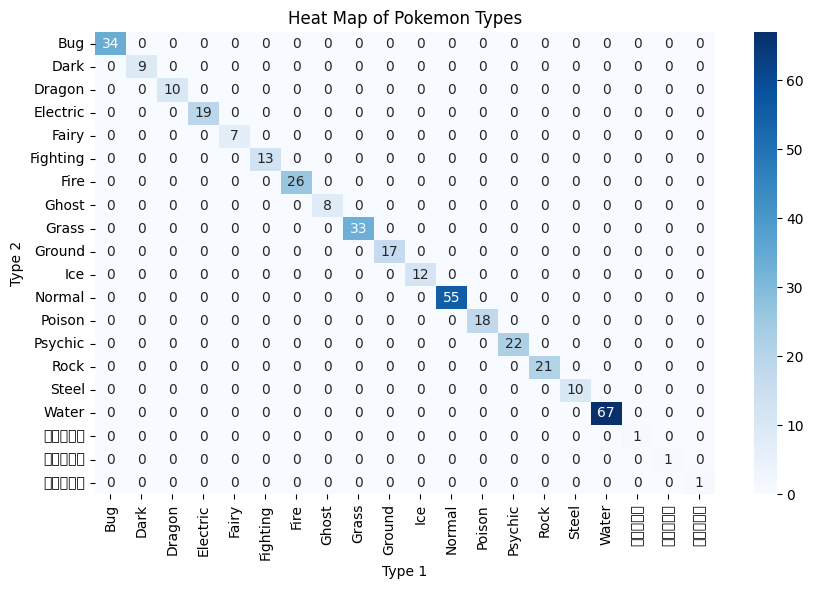

In [161]:
temp_frame = pd.crosstab(fullPokedex['Type 1'], fullPokedex['Type 2'])
plt.figure(figsize=(10,6))
sns.heatmap(temp_frame, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Type 1')
plt.ylabel('Type 2')
plt.title('Heat Map of Pokemon Types')
plt.show()